In [ ]:
pip install xgboost

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Basic packages
from scipy import stats; from scipy.stats import zscore, norm, randint
import matplotlib.style as style; style.use('fivethirtyeight')
#import plotly.express as px
%matplotlib inline

# Impute and Encode
from sklearn.preprocessing import LabelEncoder
#from impute.imputation.cs import mice

# Modelling - LR, KNN, NB, Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score,roc_curve

# Oversampling
from imblearn.over_sampling import SMOTE

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

# Visualize Tree
from sklearn.tree import export_graphviz
from IPython.display import Image
from os import system

# Display settings
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000


In [2]:
df_train = pd.read_csv("train_F3fUq2S.csv")
df_train.head()

campaign_id  sender  subject_len  body_len  mean_paragraph_len  \
0            1       3           76     10439                  39   
1            2       3           54      2570                 256   
2            3       3           59     12801                  16   
3            4       3           74     11037                  30   
4            5       3           80     10011                  27   

   day_of_week  is_weekend times_of_day  category  product  no_of_CTA  \
0            5           1         Noon         6       26          3   
1            5           1      Morning         2       11          0   
2            5           1         Noon         2       11          3   
3            4           0      Evening        15        9          4   
4            5           1         Noon         6       26          3   

   mean_CTA_len  is_image  is_personalised  is_quote  is_timer  is_emoticons  \
0            29         0                0         0         0             0   
1            22         0                0         0         0             0   
2            23         1                0         1         0             0   
3            24         0                0         0         0             0   
4            31         0                0         1         0             0   

   is_discount  is_price  is_urgency  target_audience  click_rate  
0            0         0           0               14    0.103079  
1            0         0           0               10    0.700000  
2            0         0           0               16    0.002769  
3            0         0           0               10    0.010868  
4            0         0           0               14    0.142826

In [3]:
df_train.shape

(1888, 22)

In [4]:
df_train.describe()

campaign_id       sender  subject_len      body_len  \
count  1888.000000  1888.000000  1888.000000   1888.000000   
mean    944.500000     4.395657    86.246292  14185.780191   
std     545.162973     3.277927    30.143206   7327.615307   
min       1.000000     0.000000     9.000000     23.000000   
25%     472.750000     3.000000    69.000000   9554.500000   
50%     944.500000     3.000000    83.000000  12689.000000   
75%    1416.250000     3.000000    98.000000  17351.500000   
max    1888.000000    15.000000   265.000000  44491.000000   

       mean_paragraph_len  day_of_week   is_weekend     category      product  \
count         1888.000000  1888.000000  1888.000000  1888.000000  1888.000000   
mean            35.239407     2.828390     0.199682     9.949682    17.525424   
std             28.139498     1.763193     0.399867     5.300719    12.369526   
min              4.000000     0.000000     0.000000     0.000000     0.000000   
25%             21.000000     1.000000     0.000000     6.000000     9.000000   
50%             29.000000     3.000000     0.000000    10.000000    12.000000   
75%             40.000000     4.000000     0.000000    15.000000    27.250000   
max            286.000000     6.000000     1.000000    15.000000    43.000000   

         no_of_CTA  mean_CTA_len     is_image  is_personalised     is_quote  \
count  1888.000000   1888.000000  1888.000000      1888.000000  1888.000000   
mean      4.222458     30.233051     0.909958         0.056674     0.834216   
std       4.628348     11.848663     0.866467         0.231279     1.033901   
min       0.000000      0.000000     0.000000         0.000000     0.000000   
25%       2.000000     23.000000     0.000000         0.000000     0.000000   
50%       3.000000     29.000000     1.000000         0.000000     1.000000   
75%       5.000000     35.000000     2.000000         0.000000     1.000000   
max      49.000000    162.000000     6.000000         1.000000     6.000000   

       is_timer  is_emoticons  is_discount      is_price   is_urgency  \
count    1888.0   1888.000000  1888.000000   1888.000000  1888.000000   
mean        0.0      0.210805     0.039725     40.197034     0.112288   
std         0.0      0.613442     0.195363    553.957470     0.315804   
min         0.0      0.000000     0.000000      0.000000     0.000000   
25%         0.0      0.000000     0.000000      0.000000     0.000000   
50%         0.0      0.000000     0.000000      0.000000     0.000000   
75%         0.0      0.000000     0.000000      0.000000     0.000000   
max         0.0      6.000000     1.000000  14999.000000     1.000000   

       target_audience   click_rate  
count      1888.000000  1888.000000  
mean         11.634534     0.041888  
std           2.949121     0.084223  
min           0.000000     0.000000  
25%          12.000000     0.005413  
50%          12.000000     0.010686  
75%          12.000000     0.035589  
max          16.000000     0.897959

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
campaign_id           1888 non-null int64
sender                1888 non-null int64
subject_len           1888 non-null int64
body_len              1888 non-null int64
mean_paragraph_len    1888 non-null int64
day_of_week           1888 non-null int64
is_weekend            1888 non-null int64
times_of_day          1888 non-null object
category              1888 non-null int64
product               1888 non-null int64
no_of_CTA             1888 non-null int64
mean_CTA_len          1888 non-null int64
is_image              1888 non-null int64
is_personalised       1888 non-null int64
is_quote              1888 non-null int64
is_timer              1888 non-null int64
is_emoticons          1888 non-null int64
is_discount           1888 non-null int64
is_price              1888 non-null int64
is_urgency            1888 non-null int64
target_audience       1888 non-null int64
click_rate

In [6]:
df_train.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

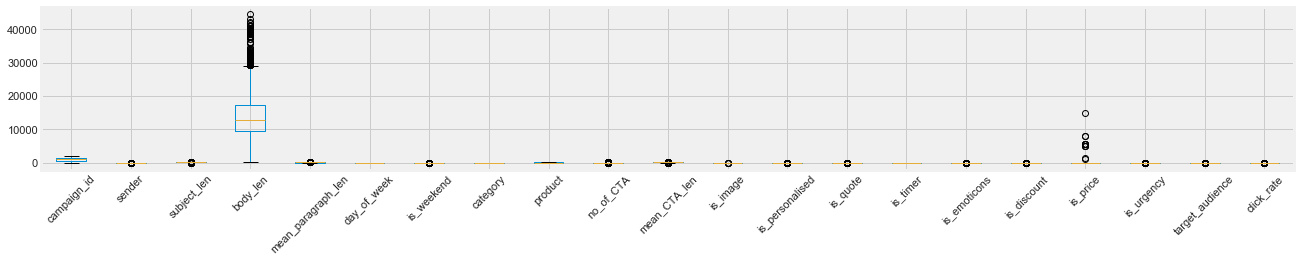

In [7]:
df_train.boxplot(figsize=(20,3))
plt.xticks(rotation=45)
plt.show()

In [8]:
for column in df_train.columns:
    if df_train[column].dtype == 'object':
        print(column.upper(),': ',df_train[column].nunique())
        print(df_train[column].value_counts().sort_values())
        print('\n')

TIMES_OF_DAY :  3
Morning     124
Noon        447
Evening    1317
Name: times_of_day, dtype: int64




In [47]:
df_test = pd.read_csv("test_Bk2wfZ3.csv")
df_test.head()

campaign_id  sender  subject_len  body_len  mean_paragraph_len  \
0         1889       3           61     12871                  11   
1         1890       3           54      2569                 256   
2         1891       3           88      1473                  78   
3         1892       3           88      1473                  78   
4         1893       3           78      9020                  29   

   day_of_week  is_weekend times_of_day  category  product  no_of_CTA  \
0            6           1         Noon         6       26          3   
1            5           1      Morning         2       11          0   
2            4           0      Evening         2       11          0   
3            3           0      Evening         2       11          0   
4            3           0         Noon         6       26          2   

   mean_CTA_len  is_image  is_personalised  is_quote  is_timer  is_emoticons  \
0            37         1                0         0         0             1   
1            22         0                0         0         0             0   
2            22         1                0         1         0             0   
3            22         1                0         1         0             0   
4            40         0                0         0         0             0   

   is_discount  is_price  is_urgency  target_audience  
0            0         0           0               14  
1            0         0           0               10  
2            0         0           0               10  
3            0         0           0               10  
4            0         0           0               14

In [10]:
df_test.shape

(762, 21)

In [11]:
df_test.describe()

campaign_id      sender  subject_len      body_len  mean_paragraph_len  \
count   762.000000  762.000000   762.000000    762.000000          762.000000   
mean   2269.500000    4.249344    86.509186  14184.263780           33.185039   
std     220.114743    3.131927    30.586394   7179.056026           26.889537   
min    1889.000000    1.000000    11.000000     23.000000            4.000000   
25%    2079.250000    3.000000    68.000000   9697.250000           20.000000   
50%    2269.500000    3.000000    83.000000  12740.500000           27.500000   
75%    2459.750000    3.000000    98.000000  16746.000000           39.000000   
max    2650.000000   15.000000   265.000000  44491.000000          498.000000   

       day_of_week  is_weekend    category     product   no_of_CTA  \
count   762.000000  762.000000  762.000000  762.000000  762.000000   
mean      2.850394    0.209974    9.590551   17.872703    4.212598   
std       1.791697    0.407557    5.314579   11.786908    3.911229   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       1.000000    0.000000    6.000000    9.000000    2.000000   
50%       3.000000    0.000000   10.000000   13.000000    3.000000   
75%       4.000000    0.000000   15.000000   26.000000    5.000000   
max       6.000000    1.000000   15.000000   44.000000   42.000000   

       mean_CTA_len    is_image  is_personalised    is_quote  is_timer  \
count    762.000000  762.000000       762.000000  762.000000     762.0   
mean      30.154856    0.942257         0.043307    0.864829       0.0   
std       10.952515    0.877114         0.203681    1.028553       0.0   
min        0.000000    0.000000         0.000000    0.000000       0.0   
25%       24.000000    0.000000         0.000000    0.000000       0.0   
50%       29.000000    1.000000         0.000000    1.000000       0.0   
75%       35.000000    2.000000         0.000000    1.000000       0.0   
max       96.000000    6.000000         1.000000    5.000000       0.0   

       is_emoticons  is_discount     is_price  is_urgency  target_audience  
count    762.000000   762.000000   762.000000  762.000000       762.000000  
mean       0.286089     0.031496    20.994751    0.114173        11.648294  
std        0.973791     0.174769   315.295844    0.318230         3.034567  
min        0.000000     0.000000     0.000000    0.000000         0.000000  
25%        0.000000     0.000000     0.000000    0.000000        12.000000  
50%        0.000000     0.000000     0.000000    0.000000        12.000000  
75%        0.000000     0.000000     0.000000    0.000000        12.000000  
max       17.000000     1.000000  5000.000000    1.000000        16.000000

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 21 columns):
campaign_id           762 non-null int64
sender                762 non-null int64
subject_len           762 non-null int64
body_len              762 non-null int64
mean_paragraph_len    762 non-null int64
day_of_week           762 non-null int64
is_weekend            762 non-null int64
times_of_day          762 non-null object
category              762 non-null int64
product               762 non-null int64
no_of_CTA             762 non-null int64
mean_CTA_len          762 non-null int64
is_image              762 non-null int64
is_personalised       762 non-null int64
is_quote              762 non-null int64
is_timer              762 non-null int64
is_emoticons          762 non-null int64
is_discount           762 non-null int64
is_price              762 non-null int64
is_urgency            762 non-null int64
target_audience       762 non-null int64
dtypes: int64(20), object(1)
memo

In [13]:
df_test.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
dtype: int64

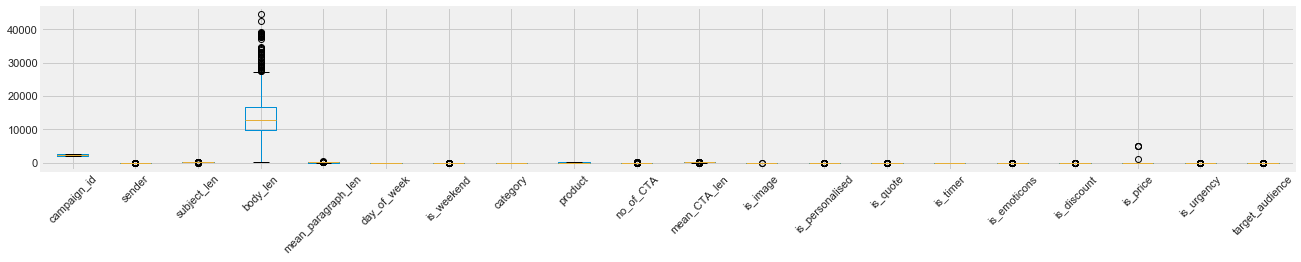

In [14]:
df_test.boxplot(figsize=(20,3))
plt.xticks(rotation=45)
plt.show()

In [15]:
for column in df_test.columns:
    if df_test[column].dtype == 'object':
        print(column.upper(),': ',df_test[column].nunique())
        print(df_test[column].value_counts().sort_values())
        print('\n')

TIMES_OF_DAY :  3
Morning     55
Noon       175
Evening    532
Name: times_of_day, dtype: int64




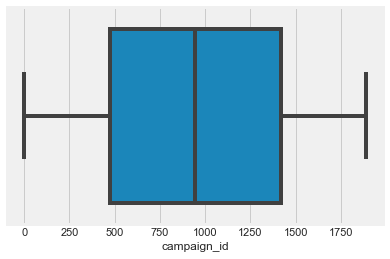

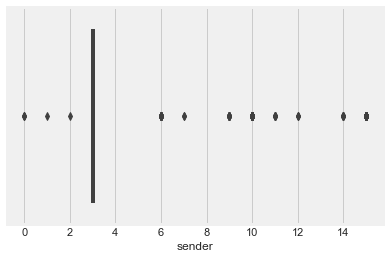

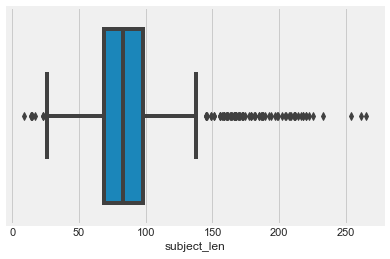

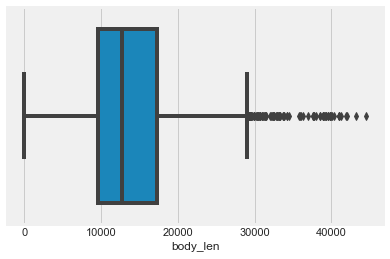

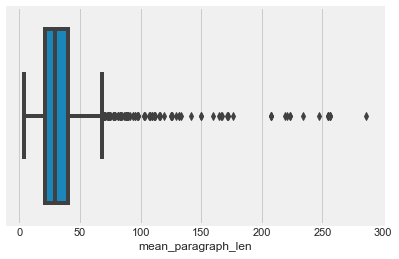

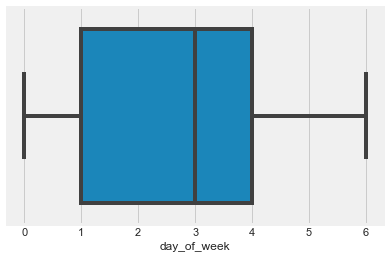

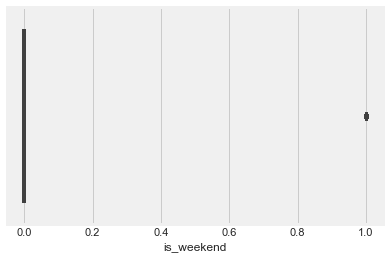

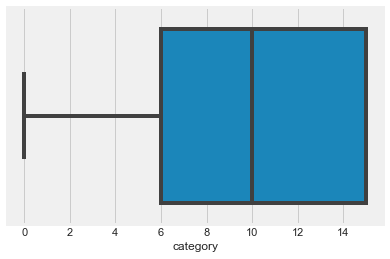

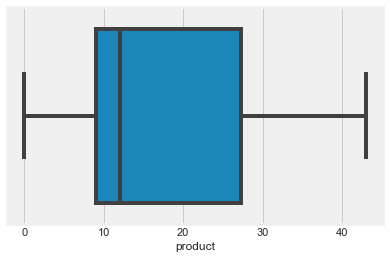

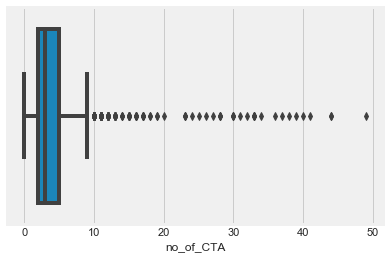

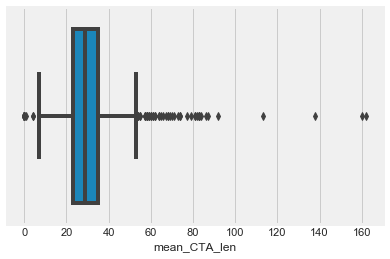

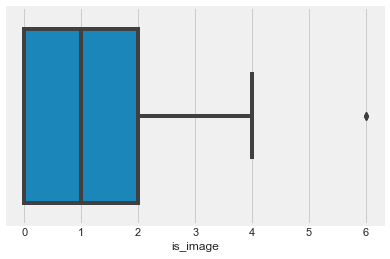

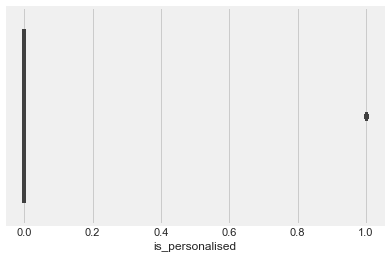

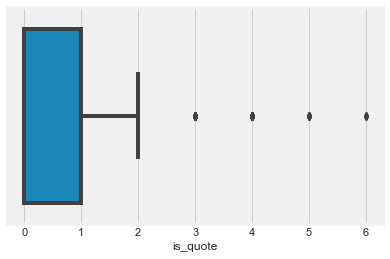

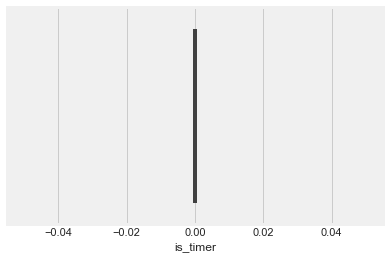

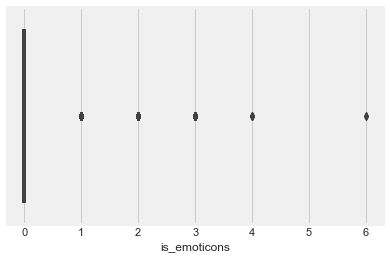

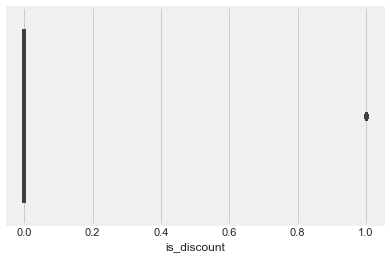

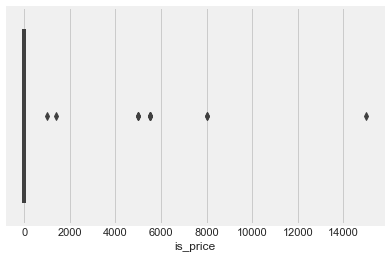

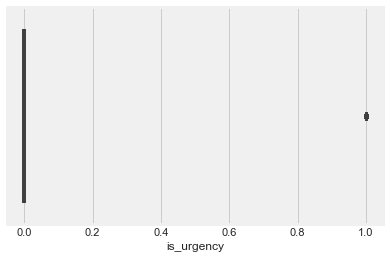

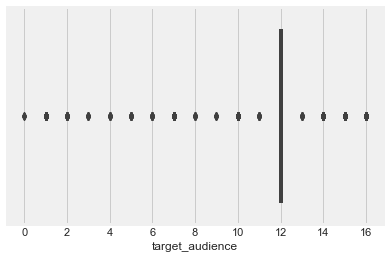

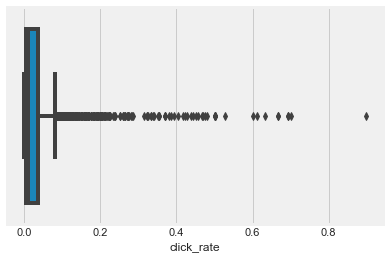

In [16]:
plot_cols=df_train.columns
for i in plot_cols:
    if df_train[i].dtype != 'object' and df_train[i].isnull().values.any() != True:
        sns.boxplot(df_train[i])
        plt.show()

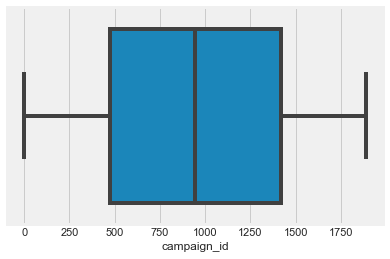

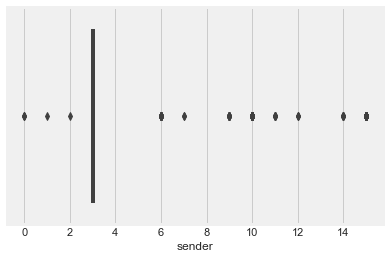

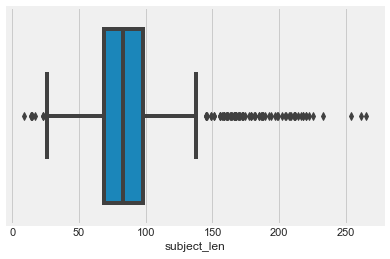

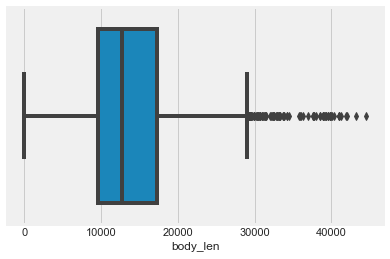

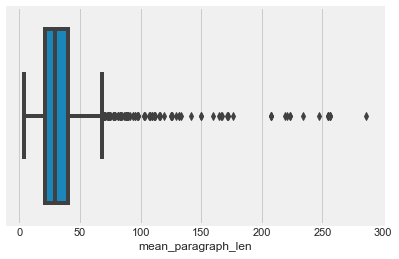

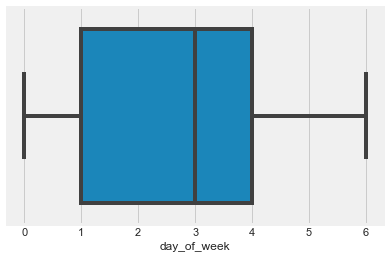

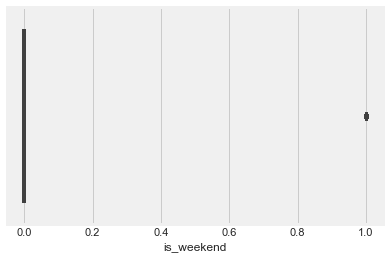

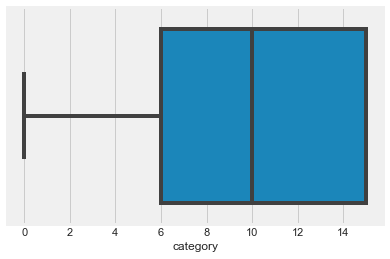

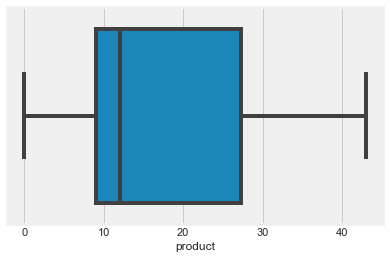

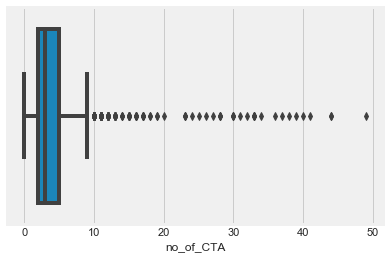

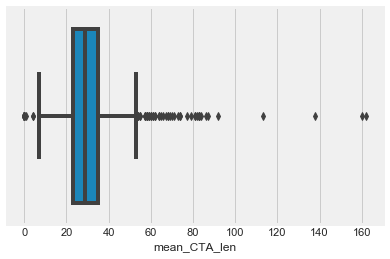

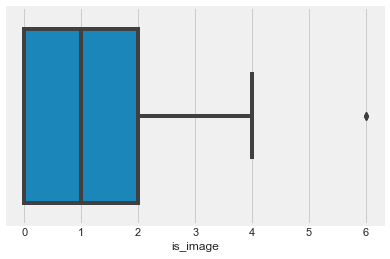

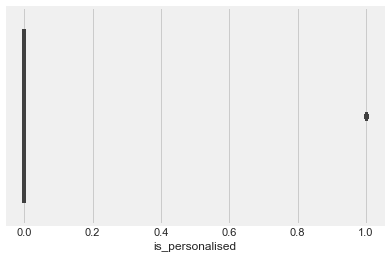

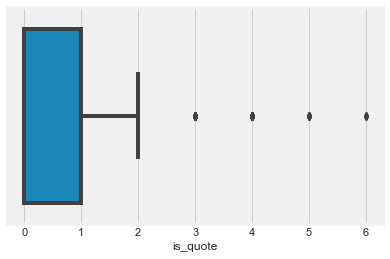

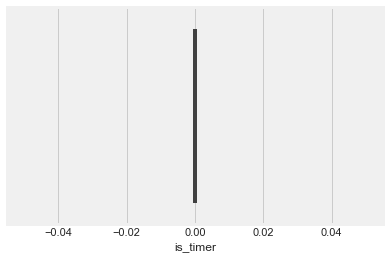

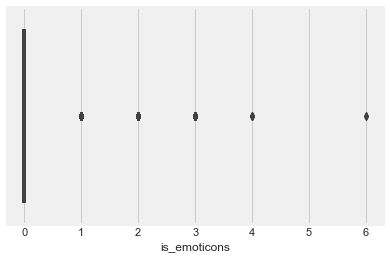

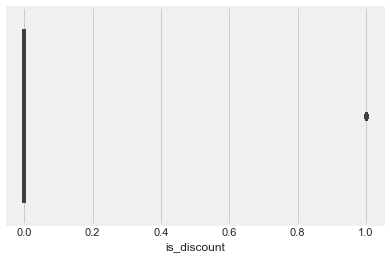

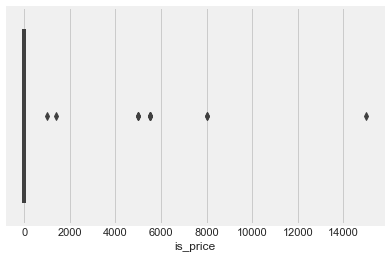

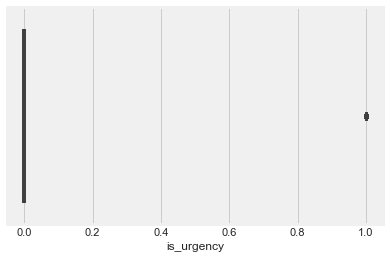

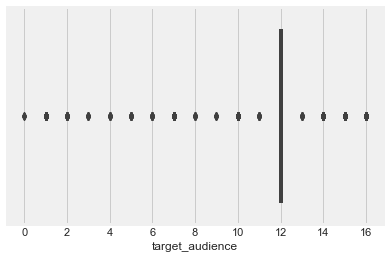

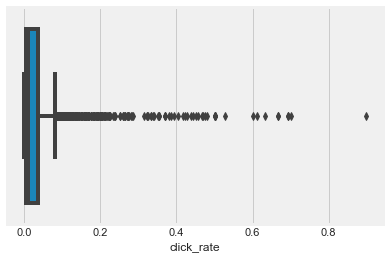

In [16]:
plot_cols=df_test.columns
for i in plot_cols:
    if df_test[i].dtype != 'object' and df_test[i].isnull().values.any() != True:
        sns.boxplot(df_test[i])
        plt.show()

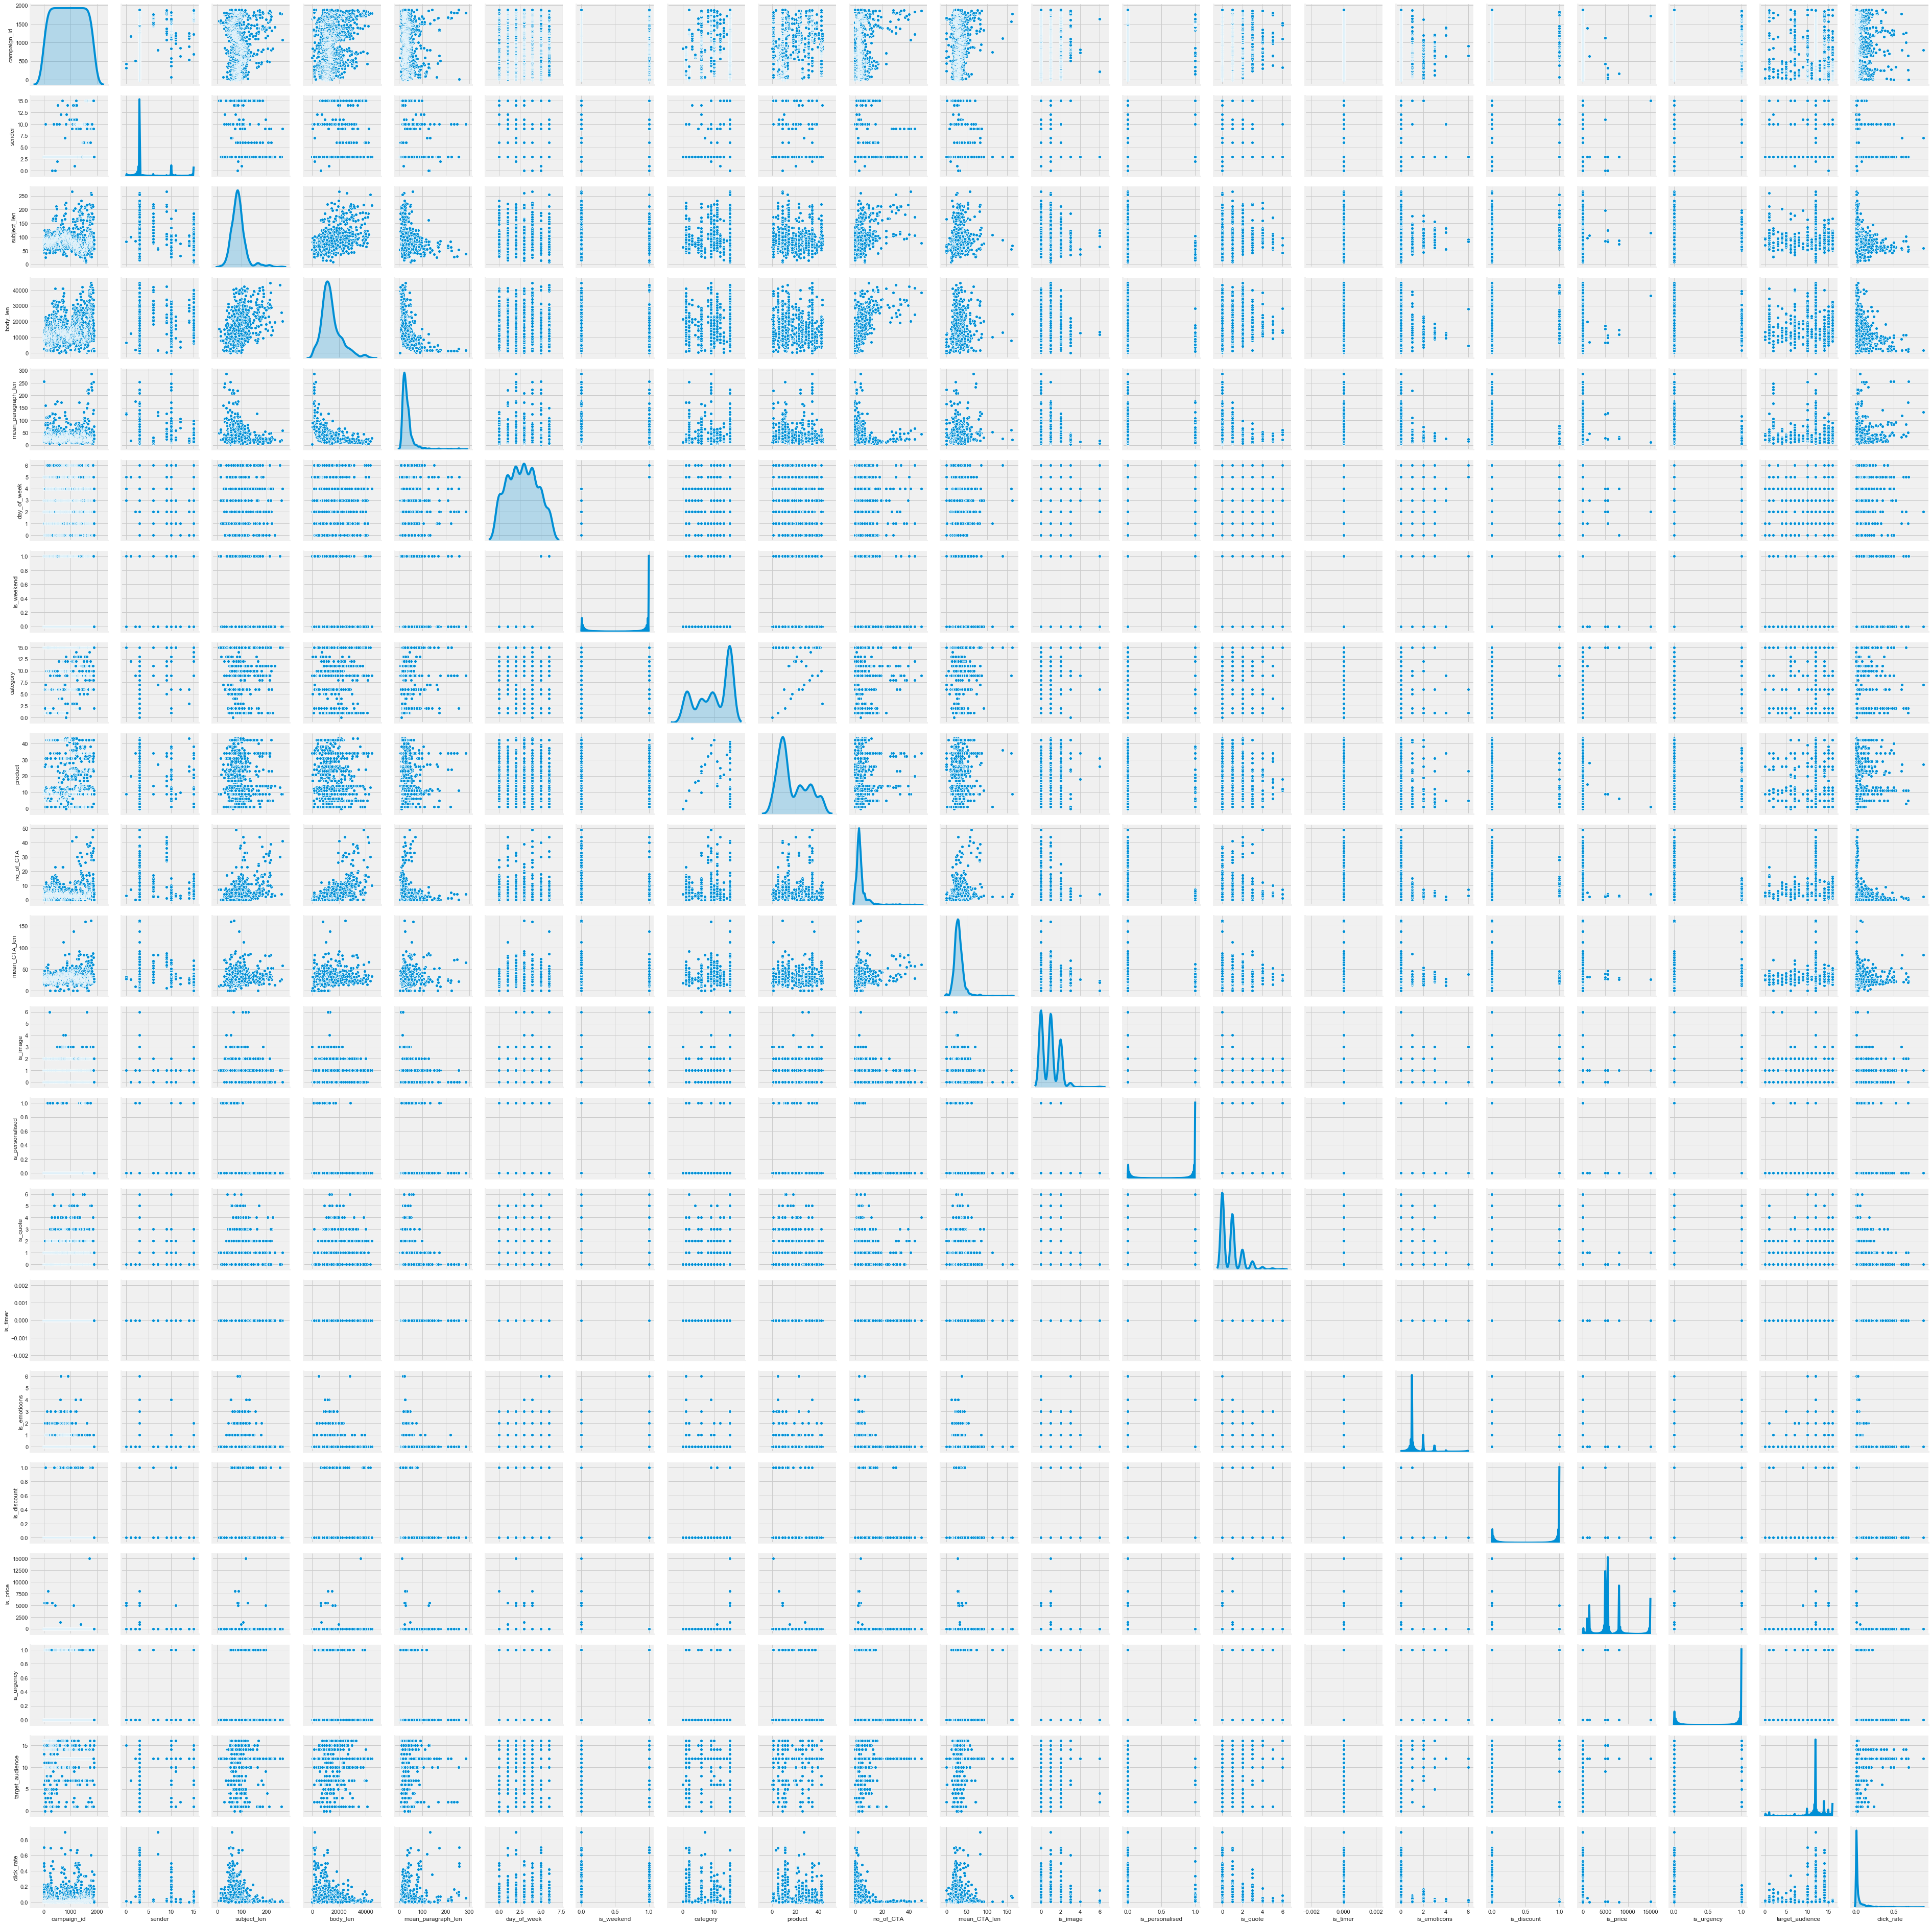

In [17]:
sns.pairplot(df_train,diag_kind='kde',palette="tab10")

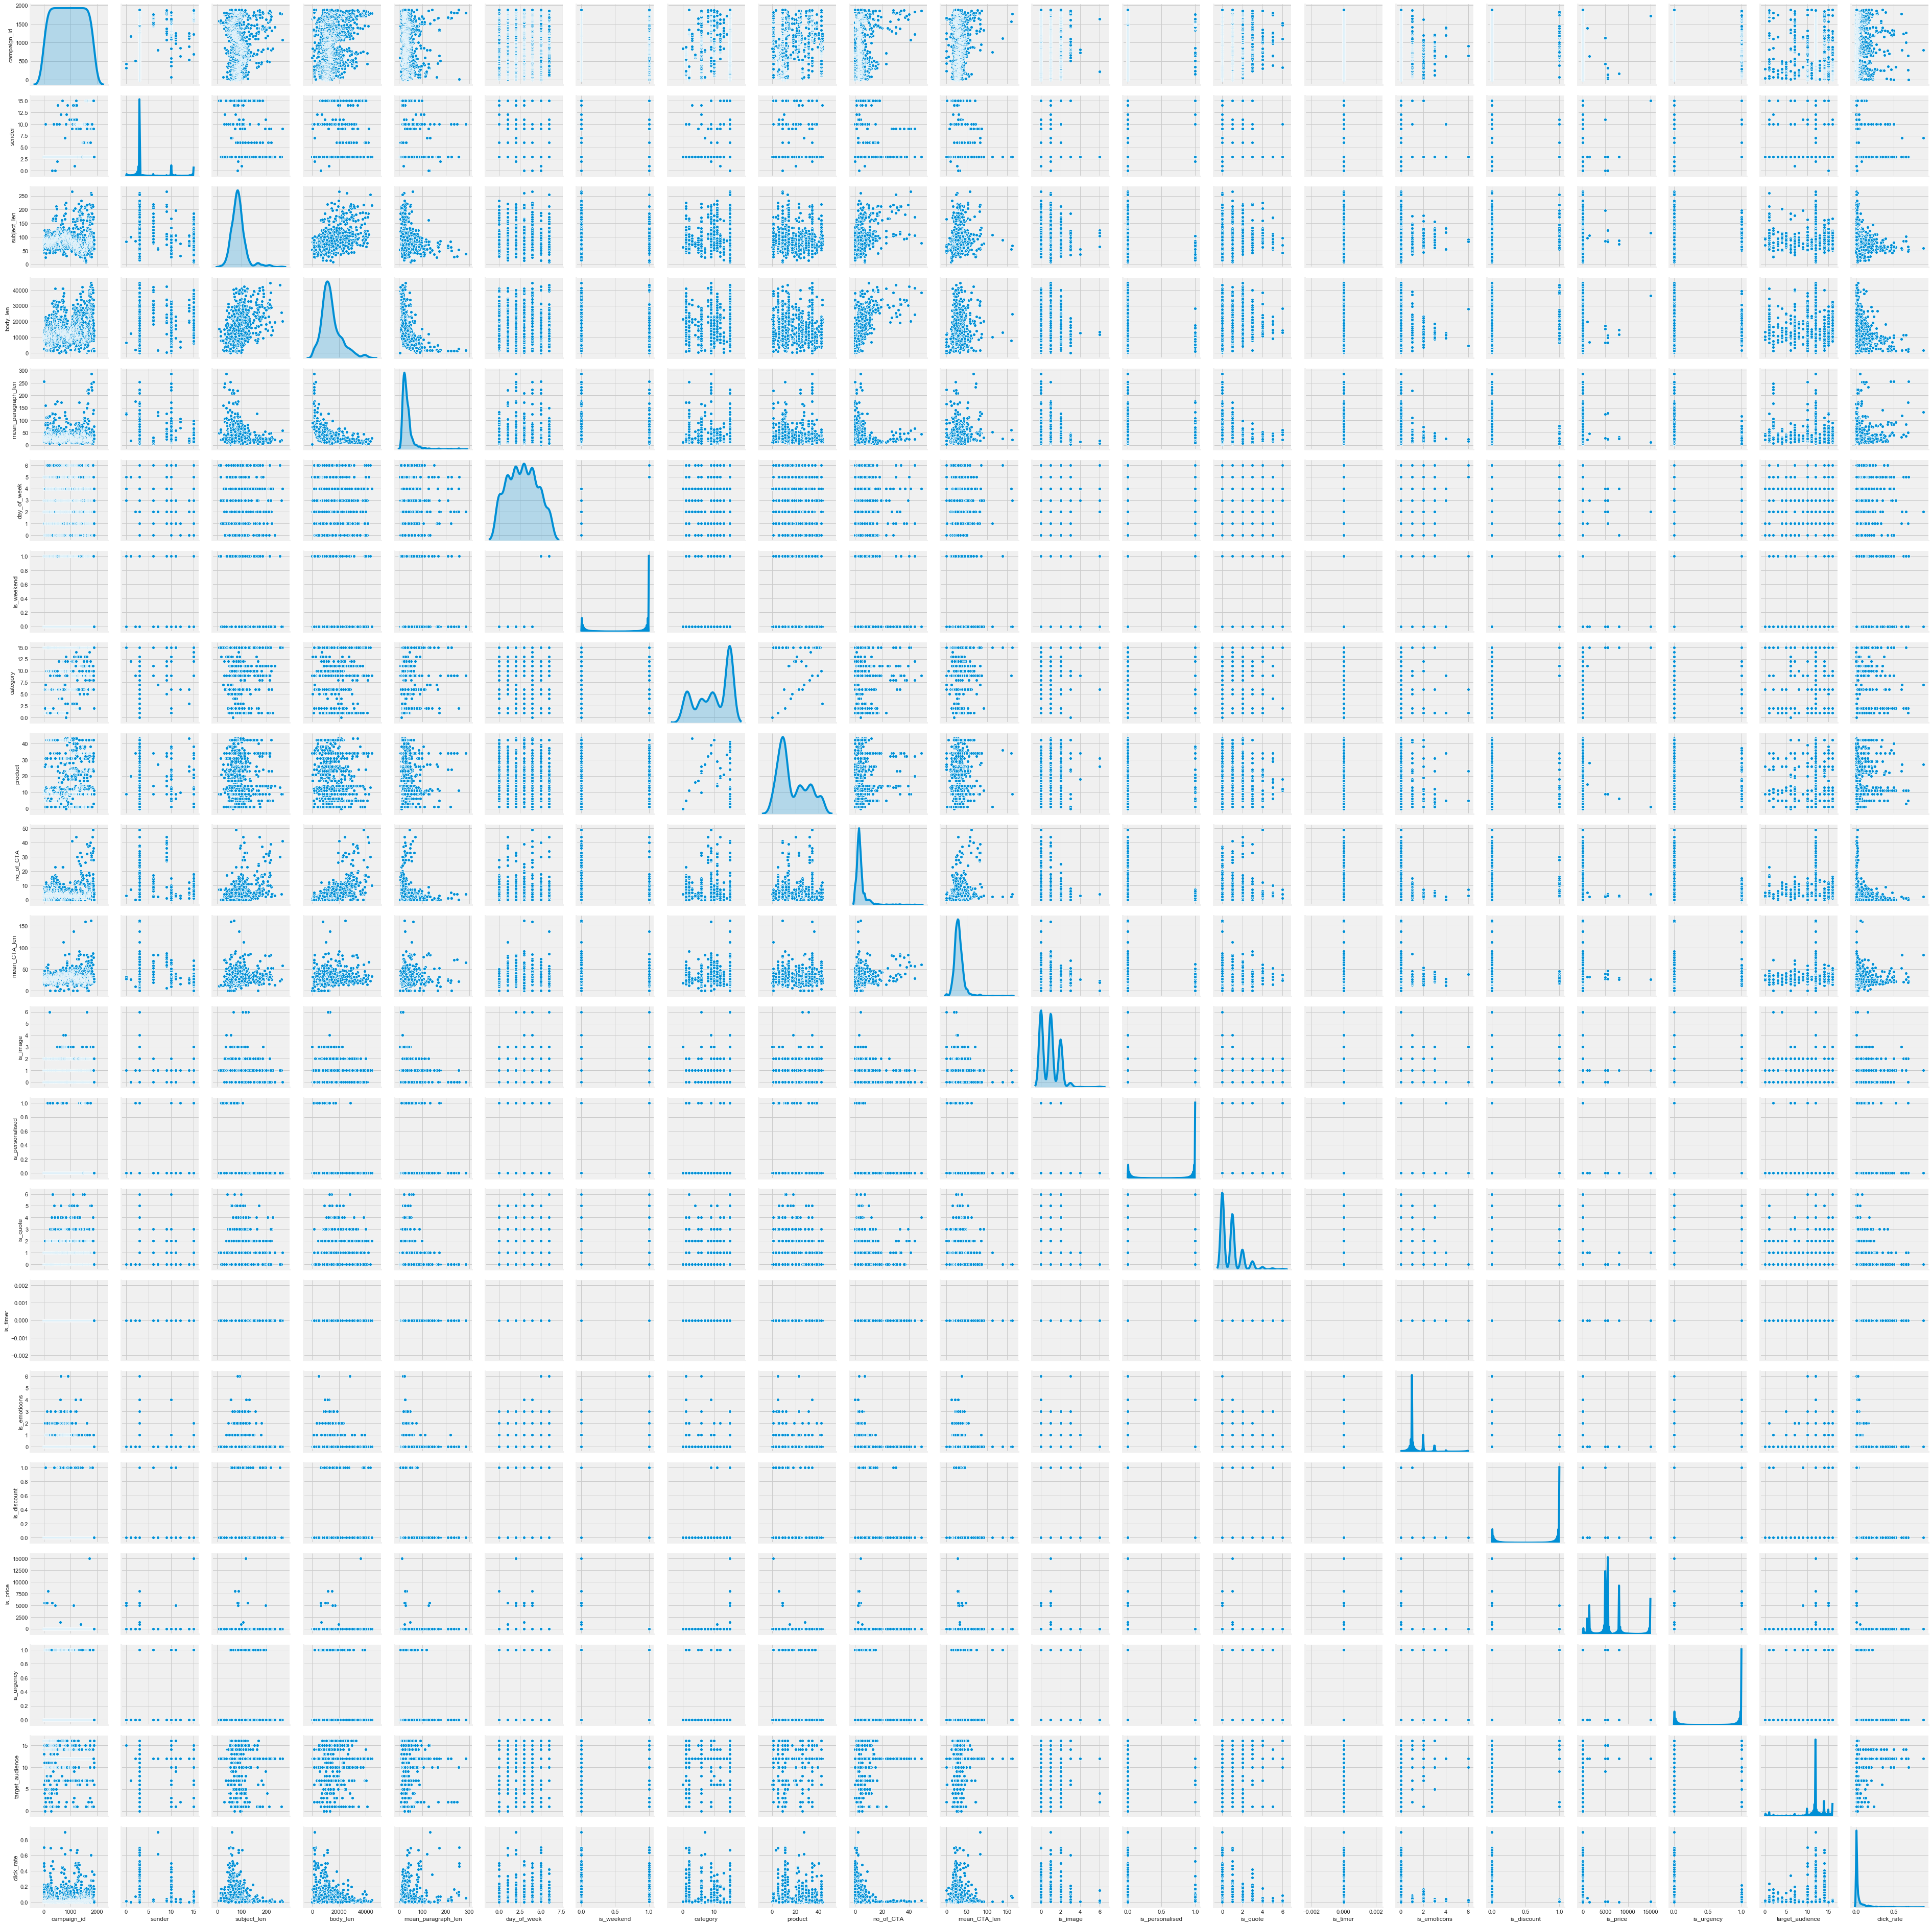

In [17]:
sns.pairplot(df_test,diag_kind='kde',palette="tab10")

In [18]:
df_train.corr()

campaign_id    sender  subject_len  body_len  \
campaign_id            1.000000  0.443314    -0.052252  0.200128   
sender                 0.443314  1.000000    -0.102559  0.197929   
subject_len           -0.052252 -0.102559     1.000000  0.427326   
body_len               0.200128  0.197929     0.427326  1.000000   
mean_paragraph_len     0.028225  0.056891    -0.224770 -0.496146   
day_of_week            0.036410 -0.046928    -0.033574 -0.089146   
is_weekend             0.051932 -0.059499    -0.056666 -0.079255   
category               0.289416  0.188444     0.012601  0.026781   
product                0.209435  0.070689    -0.007108 -0.027747   
no_of_CTA              0.117558  0.100454     0.400213  0.559353   
mean_CTA_len           0.092375  0.016604     0.144261  0.083468   
is_image              -0.022799 -0.093244    -0.002214 -0.021254   
is_personalised        0.219755  0.147959    -0.293446 -0.220696   
is_quote              -0.006662  0.020928     0.120273  0.184035   
is_timer                    NaN       NaN          NaN       NaN   
is_emoticons          -0.128840 -0.105279     0.080303 -0.043931   
is_discount           -0.002232 -0.046900     0.125134  0.051123   
is_price              -0.041955  0.024099     0.033410  0.022431   
is_urgency            -0.058105 -0.071096     0.100584  0.023734   
target_audience       -0.104905 -0.132554    -0.021855 -0.075754   
click_rate             0.053315 -0.031398    -0.180143 -0.247866   

                    mean_paragraph_len  day_of_week  is_weekend  category  \
campaign_id                   0.028225     0.036410    0.051932  0.289416   
sender                        0.056891    -0.046928   -0.059499  0.188444   
subject_len                  -0.224770    -0.033574   -0.056666  0.012601   
body_len                     -0.496146    -0.089146   -0.079255  0.026781   
mean_paragraph_len            1.000000     0.003221   -0.012964  0.037475   
day_of_week                   0.003221     1.000000    0.720599 -0.058760   
is_weekend                   -0.012964     0.720599    1.000000 -0.063763   
category                      0.037475    -0.058760   -0.063763  1.000000   
product                      -0.054066     0.000249   -0.015759  0.007144   
no_of_CTA                    -0.170012    -0.037789   -0.033464 -0.023931   
mean_CTA_len                  0.064632    -0.003614   -0.032421  0.127554   
is_image                     -0.091250     0.019365    0.036626 -0.028794   
is_personalised               0.162480    -0.069705   -0.065130  0.132441   
is_quote                     -0.096086    -0.032476   -0.033968 -0.101411   
is_timer                           NaN          NaN         NaN       NaN   
is_emoticons                 -0.043173    -0.013571   -0.007504  0.100071   
is_discount                  -0.032096    -0.037122   -0.033757  0.166200   
is_price                      0.006765    -0.013822   -0.036255  0.068450   
is_urgency                   -0.037435     0.012735   -0.009789  0.189839   
target_audience              -0.110896     0.081693    0.046638 -0.026602   
click_rate                    0.178042     0.086372    0.114138 -0.167756   

                     product  no_of_CTA  mean_CTA_len  is_image  \
campaign_id         0.209435   0.117558      0.092375 -0.022799   
sender              0.070689   0.100454      0.016604 -0.093244   
subject_len        -0.007108   0.400213      0.144261 -0.002214   
body_len           -0.027747   0.559353      0.083468 -0.021254   
mean_paragraph_len -0.054066  -0.170012      0.064632 -0.091250   
day_of_week         0.000249  -0.037789     -0.003614  0.019365   
is_weekend         -0.015759  -0.033464     -0.032421  0.036626   
category            0.007144  -0.023931      0.127554 -0.028794   
product             1.000000   0.027486      0.043223  0.027952   
no_of_CTA           0.027486   1.000000      0.170387 -0.005971   
mean_CTA_len        0.043223   0.170387      1.000000 -0.021751   
is_image            0.02

In [19]:
df_train = df_train.drop(['campaign_id','is_timer'],axis=1)
df_train.columns

Index(['sender', 'subject_len', 'body_len', 'mean_paragraph_len',
       'day_of_week', 'is_weekend', 'times_of_day', 'category', 'product',
       'no_of_CTA', 'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote',
       'is_emoticons', 'is_discount', 'is_price', 'is_urgency',
       'target_audience', 'click_rate'],
      dtype='object')

In [48]:
test_file_ids = df_test['campaign_id']
df_test = df_test.drop(['campaign_id','is_timer'],axis=1)
df_test.columns

Index(['sender', 'subject_len', 'body_len', 'mean_paragraph_len',
       'day_of_week', 'is_weekend', 'times_of_day', 'category', 'product',
       'no_of_CTA', 'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote',
       'is_emoticons', 'is_discount', 'is_price', 'is_urgency',
       'target_audience'],
      dtype='object')

In [20]:
df_train.corr()

sender  subject_len  body_len  mean_paragraph_len  \
sender              1.000000    -0.102559  0.197929            0.056891   
subject_len        -0.102559     1.000000  0.427326           -0.224770   
body_len            0.197929     0.427326  1.000000           -0.496146   
mean_paragraph_len  0.056891    -0.224770 -0.496146            1.000000   
day_of_week        -0.046928    -0.033574 -0.089146            0.003221   
is_weekend         -0.059499    -0.056666 -0.079255           -0.012964   
category            0.188444     0.012601  0.026781            0.037475   
product             0.070689    -0.007108 -0.027747           -0.054066   
no_of_CTA           0.100454     0.400213  0.559353           -0.170012   
mean_CTA_len        0.016604     0.144261  0.083468            0.064632   
is_image           -0.093244    -0.002214 -0.021254           -0.091250   
is_personalised     0.147959    -0.293446 -0.220696            0.162480   
is_quote            0.020928     0.120273  0.184035           -0.096086   
is_emoticons       -0.105279     0.080303 -0.043931           -0.043173   
is_discount        -0.046900     0.125134  0.051123           -0.032096   
is_price            0.024099     0.033410  0.022431            0.006765   
is_urgency         -0.071096     0.100584  0.023734           -0.037435   
target_audience    -0.132554    -0.021855 -0.075754           -0.110896   
click_rate         -0.031398    -0.180143 -0.247866            0.178042   

                    day_of_week  is_weekend  category   product  no_of_CTA  \
sender                -0.046928   -0.059499  0.188444  0.070689   0.100454   
subject_len           -0.033574   -0.056666  0.012601 -0.007108   0.400213   
body_len              -0.089146   -0.079255  0.026781 -0.027747   0.559353   
mean_paragraph_len     0.003221   -0.012964  0.037475 -0.054066  -0.170012   
day_of_week            1.000000    0.720599 -0.058760  0.000249  -0.037789   
is_weekend             0.720599    1.000000 -0.063763 -0.015759  -0.033464   
category              -0.058760   -0.063763  1.000000  0.007144  -0.023931   
product                0.000249   -0.015759  0.007144  1.000000   0.027486   
no_of_CTA             -0.037789   -0.033464 -0.023931  0.027486   1.000000   
mean_CTA_len          -0.003614   -0.032421  0.127554  0.043223   0.170387   
is_image               0.019365    0.036626 -0.028794  0.027952  -0.005971   
is_personalised       -0.069705   -0.065130  0.132441  0.047566  -0.145453   
is_quote              -0.032476   -0.033968 -0.101411 -0.104653   0.092320   
is_emoticons          -0.013571   -0.007504  0.100071  0.013122  -0.037244   
is_discount           -0.037122   -0.033757  0.166200 -0.018291   0.041797   
is_price              -0.013822   -0.036255  0.068450 -0.060512  -0.015229   
is_urgency             0.012735   -0.009789  0.189839 -0.110753  -0.015649   
target_audience        0.081693    0.046638 -0.026602  0.058073  -0.007979   
click_rate             0.086372    0.114138 -0.167756  0.121602  -0.172637   

                    mean_CTA_len  is_image  is_personalised  is_quote  \
sender                  0.016604 -0.093244         0.147959  0.020928   
subject_len             0.144261 -0.002214        -0.293446  0.120273   
body_len                0.083468 -0.021254        -0.220696  0.184035   
mean_paragraph_len      0.064632 -0.091250         0.162480 -0.096086   
day_of_week            -0.003614  0.019365        -0.069705 -0.032476   
is_weekend             -0.032421  0.036626        -0.065130 -0.033968   
category                0.127554 -0.028794         0.132441 -0.101411   
product                 0.043223  0.027952         0.047566 -0.104653   
no_of_CTA               0.170387 -0.005971        -0.145453  0.092320   
mean_CTA_len            1.000000 -0.021751        -0.123560  0.023271   
is_image               -0.021751  1.000000         0.004322 -0.065771   
is_personalised        -0.123560  0.004322         1.000000 -0.018308   
is_quote   

In [46]:
df_test.corr()

sender  subject_len  body_len  mean_paragraph_len  \
sender              1.000000    -0.111863  0.208592            0.064393   
subject_len        -0.111863     1.000000  0.378969           -0.147691   
body_len            0.208592     0.378969  1.000000           -0.431620   
mean_paragraph_len  0.064393    -0.147691 -0.431620            1.000000   
day_of_week        -0.053292    -0.085962 -0.044482           -0.079177   
is_weekend         -0.080191    -0.041583 -0.082402           -0.013382   
category            0.175009     0.046497  0.033640            0.083086   
product             0.092842    -0.054034 -0.052836           -0.085570   
no_of_CTA           0.130724     0.403702  0.555295           -0.178209   
mean_CTA_len       -0.015033     0.257604  0.116004           -0.049129   
is_image           -0.105251    -0.084130 -0.036393           -0.095433   
is_personalised     0.088107    -0.237886 -0.208750            0.162166   
is_quote            0.023122     0.074327  0.201230           -0.064804   
is_timer                 NaN          NaN       NaN                 NaN   
is_emoticons       -0.035915     0.095914 -0.024321           -0.006089   
is_discount        -0.019168     0.099750  0.041196           -0.015223   
is_price           -0.026597    -0.030135 -0.008029           -0.012240   
is_urgency         -0.019372     0.123488  0.075161           -0.057602   
target_audience    -0.077728    -0.033788 -0.138543           -0.014017   

                    day_of_week  is_weekend  category   product  no_of_CTA  \
sender                -0.053292   -0.080191  0.175009  0.092842   0.130724   
subject_len           -0.085962   -0.041583  0.046497 -0.054034   0.403702   
body_len              -0.044482   -0.082402  0.033640 -0.052836   0.555295   
mean_paragraph_len    -0.079177   -0.013382  0.083086 -0.085570  -0.178209   
day_of_week            1.000000    0.728702 -0.050464 -0.000903  -0.084150   
is_weekend             0.728702    1.000000 -0.048830 -0.015765  -0.036285   
category              -0.050464   -0.048830  1.000000  0.054568  -0.051943   
product               -0.000903   -0.015765  0.054568  1.000000   0.027866   
no_of_CTA             -0.084150   -0.036285 -0.051943  0.027866   1.000000   
mean_CTA_len          -0.016965   -0.030845  0.157876  0.090420   0.203466   
is_image               0.002021    0.037638 -0.042007  0.065764  -0.012888   
is_personalised       -0.021832   -0.030538  0.114731  0.091517  -0.153429   
is_quote              -0.030953   -0.045055 -0.012061 -0.073500   0.054843   
is_timer                    NaN         NaN       NaN       NaN        NaN   
is_emoticons           0.020045    0.013991  0.106201  0.000429  -0.003570   
is_discount           -0.039487   -0.056072  0.129913  0.035757   0.055552   
is_price               0.052085    0.016769  0.020813  0.044918  -0.010015   
is_urgency             0.059958    0.037815  0.173748 -0.107174   0.016368   
target_audience        0.087468    0.056603 -0.023118  0.046543  -0.035431   

                    mean_CTA_len  is_image  is_personalised  is_quote  \
sender                 -0.015033 -0.105251         0.088107  0.023122   
subject_len             0.257604 -0.084130        -0.237886  0.074327   
body_len                0.116004 -0.036393        -0.208750  0.201230   
mean_paragraph_len     -0.049129 -0.095433         0.162166 -0.064804   
day_of_week            -0.016965  0.002021        -0.021832 -0.030953   
is_weekend             -0.030845  0.037638        -0.030538 -0.045055   
category                0.157876 -0.042007         0.114731 -0.012061   
product                 0.090420  0.065764         0.091517 -0.073500   
no_of_CTA               0.203466 -0.012888        -0.153429  0.054843   
mean_CTA_len            1.000000 -0.005771        -0.207410  0.010609   
is_image               -0.005771  1.000000         0.028727 -0.100427   
is_personalised        -0.207410  0.028727         1.000000  0.046797   
is_quote   

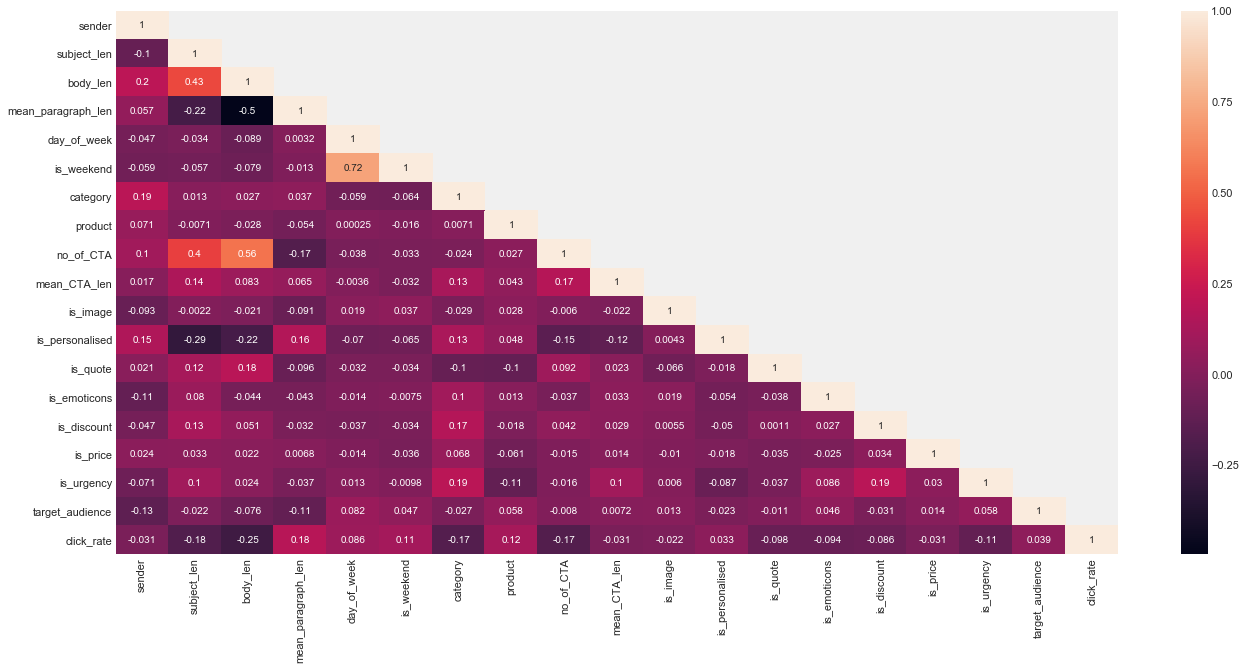

In [21]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df_train.corr(), annot=True,mask=np.triu(df_train.corr(),+1))
plt.show()

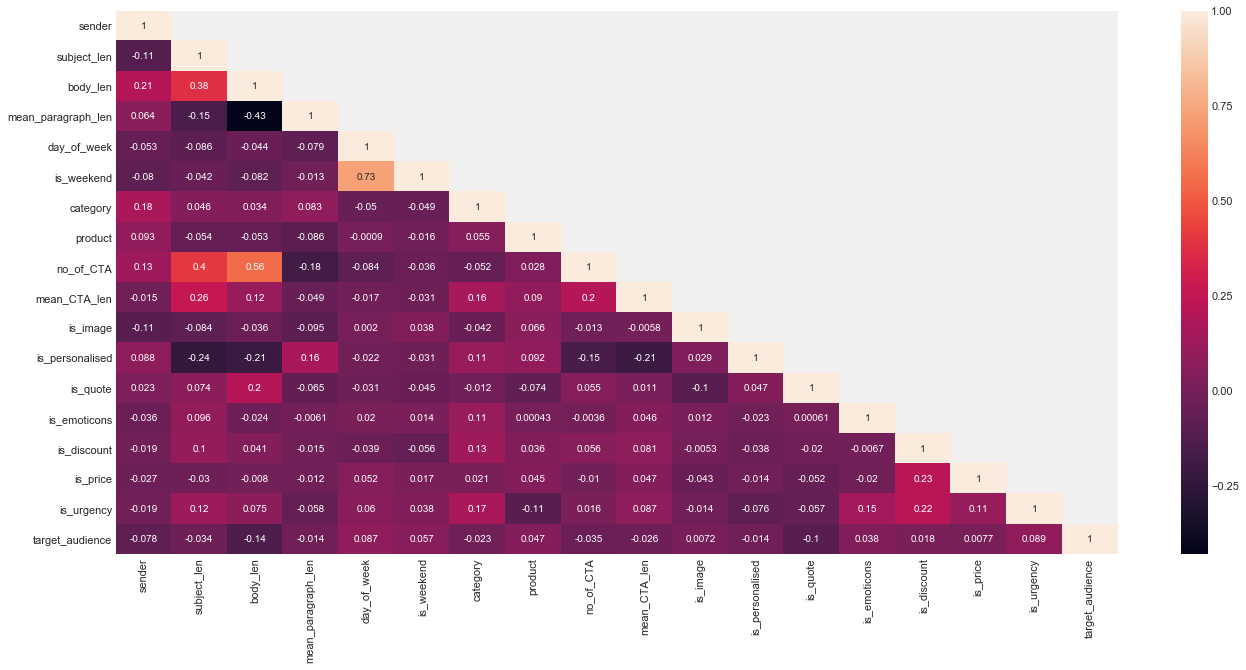

In [49]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df_test.corr(), annot=True,mask=np.triu(df_test.corr(),+1))
plt.show()

In [22]:
df_cattrain = df_train.select_dtypes(include = ['object'])
df_numtrain = df_train.select_dtypes(include = ['float64','int64'])

In [50]:
df_cattest = df_test.select_dtypes(include = ['object'])
df_numtest = df_test.select_dtypes(include = ['float64','int64'])

In [24]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'times_of_day'.
df_cattrain['times_of_day']= label_encoder.fit_transform(df_cattrain['times_of_day'])

In [51]:
# Encode labels in column 'times_of_day'.
df_cattest['times_of_day']= label_encoder.fit_transform(df_cattest['times_of_day'])

In [26]:
df_train_copy = pd.concat([df_cattrain,df_numtrain],axis=1)
df_train_copy.head()

times_of_day  sender  subject_len  body_len  mean_paragraph_len  \
0             2       3           76     10439                  39   
1             1       3           54      2570                 256   
2             2       3           59     12801                  16   
3             0       3           74     11037                  30   
4             2       3           80     10011                  27   

   day_of_week  is_weekend  category  product  no_of_CTA  mean_CTA_len  \
0            5           1         6       26          3            29   
1            5           1         2       11          0            22   
2            5           1         2       11          3            23   
3            4           0        15        9          4            24   
4            5           1         6       26          3            31   

   is_image  is_personalised  is_quote  is_emoticons  is_discount  is_price  \
0         0                0         0             0            0         0   
1         0                0         0             0            0         0   
2         1                0         1             0            0         0   
3         0                0         0             0            0         0   
4         0                0         1             0            0         0   

   is_urgency  target_audience  click_rate  
0           0               14    0.103079  
1           0               10    0.700000  
2           0               16    0.002769  
3           0               10    0.010868  
4           0               14    0.142826

In [52]:
df_test_copy = pd.concat([df_cattest,df_numtest],axis=1)
df_test_copy.head()

times_of_day  sender  subject_len  body_len  mean_paragraph_len  \
0             2       3           61     12871                  11   
1             1       3           54      2569                 256   
2             0       3           88      1473                  78   
3             0       3           88      1473                  78   
4             2       3           78      9020                  29   

   day_of_week  is_weekend  category  product  no_of_CTA  mean_CTA_len  \
0            6           1         6       26          3            37   
1            5           1         2       11          0            22   
2            4           0         2       11          0            22   
3            3           0         2       11          0            22   
4            3           0         6       26          2            40   

   is_image  is_personalised  is_quote  is_emoticons  is_discount  is_price  \
0         1                0         0             1            0         0   
1         0                0         0             0            0         0   
2         1                0         1             0            0         0   
3         1                0         1             0            0         0   
4         0                0         0             0            0         0   

   is_urgency  target_audience  
0           0               14  
1           0               10  
2           0               10  
3           0               10  
4           0               14

In [28]:
x = df_train_copy.drop('click_rate',axis=1)
y = df_train_copy['click_rate']
x.head()

times_of_day  sender  subject_len  body_len  mean_paragraph_len  \
0             2       3           76     10439                  39   
1             1       3           54      2570                 256   
2             2       3           59     12801                  16   
3             0       3           74     11037                  30   
4             2       3           80     10011                  27   

   day_of_week  is_weekend  category  product  no_of_CTA  mean_CTA_len  \
0            5           1         6       26          3            29   
1            5           1         2       11          0            22   
2            5           1         2       11          3            23   
3            4           0        15        9          4            24   
4            5           1         6       26          3            31   

   is_image  is_personalised  is_quote  is_emoticons  is_discount  is_price  \
0         0                0         0             0            0         0   
1         0                0         0             0            0         0   
2         1                0         1             0            0         0   
3         0                0         0             0            0         0   
4         0                0         1             0            0         0   

   is_urgency  target_audience  
0           0               14  
1           0               10  
2           0               16  
3           0               10  
4           0               14

In [29]:
y.head()

0    0.103079
1    0.700000
2    0.002769
3    0.010868
4    0.142826
Name: click_rate, dtype: float64

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4 , random_state=42)
x_train.shape

(1132, 19)

In [31]:
x_test.shape

(756, 19)

In [32]:
y_train.shape

(1132,)

In [33]:
y_test.shape

(756,)

###### Lasso Regression

In [38]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(normalize=True,alpha=1000,max_iter=1000, tol=0.0001)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=1000, normalize=True)

In [39]:
lasso_reg_intercept = lasso_reg.intercept_
print("The intercept for our model is {}".format(lasso_reg_intercept))

The intercept for our model is 0.04381058194959048


In [40]:
# R square on training data
print("R square value for training data ",lasso_reg.score(x_train, y_train))
# R square on testing data
print("R square value for testing data ",lasso_reg.score(x_test, y_test))
lasso_reg_model_Rsquare_value_train = lasso_reg.score(x_train, y_train)
lasso_reg_model_Rsquare_value = lasso_reg.score(x_test, y_test)

R square value for training data  0.0
R square value for testing data  -0.0038908879469614632


In [41]:
#RMSE on Training data
lasso_reg_predicted_train=lasso_reg.fit(x_train, y_train).predict(x_train)
print("Mean squared error for the training data is ",(metrics.mean_squared_error(y_train,lasso_reg_predicted_train)))
print("Root Mean squared error for the training data is ",np.sqrt(metrics.mean_squared_error(y_train,lasso_reg_predicted_train)))

#RMSE on Testing data
lasso_reg_predicted_test=lasso_reg.fit(x_train, y_train).predict(x_test)
print("Mean squared error for the testing data is ",(metrics.mean_squared_error(y_test,lasso_reg_predicted_test)))
print("Root Mean squared error for the testing data is ",np.sqrt(metrics.mean_squared_error(y_test,lasso_reg_predicted_test)))

lasso_reg_model_MSE= (metrics.mean_squared_error(y_test,lasso_reg_predicted_test))
lasso_reg_model_RMSE= np.sqrt(metrics.mean_squared_error(y_test,lasso_reg_predicted_test))

Mean squared error for the training data is  0.00785660869094093
Root Mean squared error for the training data is  0.08863751288783396
Mean squared error for the testing data is  0.005950649174634776
Root Mean squared error for the testing data is  0.07714045096209106


In [42]:
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, lasso_reg_predicted_train))
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lasso_reg_predicted_test))

lasso_reg_model_MAE_score = metrics.mean_absolute_error(y_test, lasso_reg_predicted_test)

Mean Absolute Error: 0.05041958882783777
Mean Absolute Error: 0.04621167189859694


In [43]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, lasso_reg_predicted_test))

lasso_reg_model_MAPE_score = metrics.mean_absolute_percentage_error(y_test, lasso_reg_predicted_test)

Mean Absolute Percentage Error: 5741689222157.554


In [44]:
resultsDf = pd.DataFrame({'intercept':lasso_reg_intercept,'R Square value train':lasso_reg_model_Rsquare_value_train,'R Square value':lasso_reg_model_Rsquare_value,'RMSE':lasso_reg_model_RMSE,'MSE':lasso_reg_model_MSE,'MAE':lasso_reg_model_MAE_score,'MAPE':lasso_reg_model_MAPE_score},index=['Lasso Regression'])
resultsDf

intercept  R Square value train  R Square value     RMSE  \
Lasso Regression   0.043811                   0.0       -0.003891  0.07714   

                       MSE       MAE          MAPE  
Lasso Regression  0.005951  0.046212  5.741689e+12

###### Ridge Regression

In [54]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1.0, fit_intercept=True, normalize=False, max_iter=100, tol=0.01, solver='auto')
ridge_reg.fit(x_train, y_train)

Ridge(max_iter=100, normalize=False, tol=0.01)

In [55]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, ridge_reg.coef_[0]))

The coefficient for times_of_day is 0.011784974527174348
The coefficient for sender is 0.011784974527174348
The coefficient for subject_len is 0.011784974527174348
The coefficient for body_len is 0.011784974527174348
The coefficient for mean_paragraph_len is 0.011784974527174348
The coefficient for day_of_week is 0.011784974527174348
The coefficient for is_weekend is 0.011784974527174348
The coefficient for category is 0.011784974527174348
The coefficient for product is 0.011784974527174348
The coefficient for no_of_CTA is 0.011784974527174348
The coefficient for mean_CTA_len is 0.011784974527174348
The coefficient for is_image is 0.011784974527174348
The coefficient for is_personalised is 0.011784974527174348
The coefficient for is_quote is 0.011784974527174348
The coefficient for is_emoticons is 0.011784974527174348
The coefficient for is_discount is 0.011784974527174348
The coefficient for is_price is 0.011784974527174348
The coefficient for is_urgency is 0.011784974527174348
The co

In [56]:
ridge_reg_intercept = ridge_reg.intercept_

print("The intercept for our model is {}".format(ridge_reg_intercept))

The intercept for our model is 0.07547678469490315


In [57]:
# R square on training data
print("R square value for training data ",ridge_reg.score(x_train, y_train))
# R square on testing data
print("R square value for testing data ",ridge_reg.score(x_test, y_test))
ridge_reg_model_Rsquare_value_train = ridge_reg.score(x_train, y_train)
ridge_reg_model_Rsquare_value = ridge_reg.score(x_test, y_test)

R square value for training data  0.1562901001377005
R square value for testing data  0.11300363069550123


In [58]:
#RMSE on Training data
ridge_reg_predicted_train=ridge_reg.fit(x_train, y_train).predict(x_train)
print("Mean squared error for the training data is ",(metrics.mean_squared_error(y_train,ridge_reg_predicted_train)))
print("Root Mean squared error for the training data is ",np.sqrt(metrics.mean_squared_error(y_train,ridge_reg_predicted_train)))

#RMSE on Testing data
ridge_reg_predicted_test=ridge_reg.fit(x_train, y_train).predict(x_test)
print("Mean squared error for the testing data is ",(metrics.mean_squared_error(y_test,ridge_reg_predicted_test)))
print("Root Mean squared error for the testing data is ",np.sqrt(metrics.mean_squared_error(y_test,ridge_reg_predicted_test)))

ridge_reg_model_MSE= (metrics.mean_squared_error(y_test,ridge_reg_predicted_test))
ridge_reg_model_RMSE= np.sqrt(metrics.mean_squared_error(y_test,ridge_reg_predicted_test))

Mean squared error for the training data is  0.006628698531891045
Root Mean squared error for the training data is  0.0814168197112307
Mean squared error for the testing data is  0.005257746908830117
Root Mean squared error for the testing data is  0.07251032277427895


In [59]:
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, ridge_reg_predicted_train))
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ridge_reg_predicted_test))

ridge_reg_model_MAE_score = metrics.mean_absolute_error(y_test, ridge_reg_predicted_test)

Mean Absolute Error: 0.04753143544005184
Mean Absolute Error: 0.04506312256152105


In [60]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, ridge_reg_predicted_test))

ridge_reg_model_MAPE_score = metrics.mean_absolute_percentage_error(y_test, ridge_reg_predicted_test)

Mean Absolute Percentage Error: 6941913529361.895


In [61]:
# accuracy for test scaled data
ridge_reg_accuracy = (1 - (ridge_reg_model_RMSE/y.mean()))
ridge_reg_accuracy

-0.7310703681159585

In [62]:
resultsDf1 = pd.DataFrame({'intercept':ridge_reg_intercept,'R Square value train':ridge_reg_model_Rsquare_value_train,'R Square value':ridge_reg_model_Rsquare_value,'RMSE':ridge_reg_model_RMSE,'MSE':ridge_reg_model_MSE,'MAE':ridge_reg_model_MAE_score,'MAPE':ridge_reg_model_MAPE_score},index=['Ridge Regression'])
resultsDf = pd.concat([resultsDf1,resultsDf])
resultsDf

intercept  R Square value train  R Square value     RMSE  \
Ridge Regression   0.075477               0.15629        0.113004  0.07251   
Lasso Regression   0.043811               0.00000       -0.003891  0.07714   

                       MSE       MAE          MAPE  
Ridge Regression  0.005258  0.045063  6.941914e+12  
Lasso Regression  0.005951  0.046212  5.741689e+12

###### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

In [ ]:
# R square on training data
print("R square value for training data ",rf_model.score(x_train, y_train))
# R square on testing data
print("R square value for testing data ",rf_model.score(x_test, y_test))
rf_model_Rsquare_value_train = rf_model.score(x_train, y_train)
rf_model_Rsquare_value = rf_model.score(x_test, y_test)

In [ ]:
#RMSE on Training data
rf_model_predicted_train=rf_model.fit(x_train, y_train).predict(x_train)
print("Mean squared error for the training data is ",(metrics.mean_squared_error(y_train,rf_model_predicted_train)))
print("Root Mean squared error for the training data is ",np.sqrt(metrics.mean_squared_error(y_train,rf_model_predicted_train)))

#RMSE on Testing data
rf_model_predicted_test=rf_model.fit(x_train, y_train).predict(x_test)
print("Mean squared error for the testing data is ",(metrics.mean_squared_error(y_test,rf_model_predicted_test)))
print("Root Mean squared error for the testing data is ",np.sqrt(metrics.mean_squared_error(y_test,rf_model_predicted_test)))

rf_model_MSE= (metrics.mean_squared_error(y_test,rf_model_predicted_test))
rf_model_RMSE= np.sqrt(metrics.mean_squared_error(y_test,rf_model_predicted_test))

In [ ]:
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, rf_model_predicted_train))
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_model_predicted_test))

rf_model_MAE_score = metrics.mean_absolute_error(y_test, rf_model_predicted_test)

In [ ]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, rf_model_predicted_test))

rf_model_MAPE_score = metrics.mean_absolute_percentage_error(y_test, rf_model_predicted_test)

In [ ]:
# accuracy for test scaled data
rf_model_accuracy = (1 - (rf_model_RMSE/y.mean()))
rf_model_accuracy

In [ ]:
resultsDf1 = pd.DataFrame({'intercept':"Nan",'R Square value train':rf_model_Rsquare_value_train,'R Square value':rf_model_Rsquare_value,'RMSE':rf_model_RMSE,'MSE':rf_model_MSE,'MAE':rf_model_MAE_score,'MAPE':rf_model_MAPE_score},index=['RF Model'])
resultsDf = pd.concat([resultsDf1,resultsDf])
resultsDf

###### XG BOOSTING

In [ ]:
import xgboost as xg
xgb_model = xg.XGBRegressor()
xgb_model.fit(x_train,y_train)

In [ ]:
# R square on training data
print("R square value for training data ",xgb_model.score(x_train, y_train))
# R square on testing data
print("R square value for testing data ",xgb_model.score(x_test, y_test))
xgb_model_Rsquare_value_train = xgb_model.score(x_train, y_train)
xgb_model_Rsquare_value = xgb_model.score(x_test, y_test)

In [ ]:
#RMSE on Training data
xgb_model_predicted_train=xgb_model.fit(x_train, y_train).predict(x_train)
print("Mean squared error for the training data is ",(metrics.mean_squared_error(y_train,xgb_model_predicted_train)))
print("Root Mean squared error for the training data is ",np.sqrt(metrics.mean_squared_error(y_train,xgb_model_predicted_train)))

#RMSE on Testing data
xgb_model_predicted_test=xgb_model.fit(x_train, y_train).predict(x_test)
print("Mean squared error for the testing data is ",(metrics.mean_squared_error(y_test,xgb_model_predicted_test)))
print("Root Mean squared error for the testing data is ",np.sqrt(metrics.mean_squared_error(y_test,xgb_model_predicted_test)))

xgb_model_MSE= (metrics.mean_squared_error(y_test,xgb_model_predicted_test))
xgb_model_RMSE= np.sqrt(metrics.mean_squared_error(y_test,xgb_model_predicted_test))

In [ ]:
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, xgb_model_predicted_train))
# Mean Absolute Error training data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, xgb_model_predicted_test))

xgb_model_MAE_score = metrics.mean_absolute_error(y_test, xgb_model_predicted_test)

In [ ]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, xgb_model_predicted_test))

xgb_model_MAPE_score = metrics.mean_absolute_percentage_error(y_test, xgb_model_predicted_test)

In [ ]:
# accuracy for test scaled data
xgb_model_accuracy = (1 - (xgb_model_RMSE/y.mean()))
xgb_model_accuracy

In [ ]:
resultsDf1 = pd.DataFrame({'intercept':"Nan",'R Square value train':xgb_model_Rsquare_value_train,'R Square value':xgb_model_Rsquare_value,'RMSE':xgb_model_RMSE,'MSE':xgb_model_MSE,'MAE':xgb_model_MAE_score,'MAPE':xgb_model_MAPE_score},index=['xgb model MLP Regressor'])
resultsDf = pd.concat([resultsDf1,resultsDf])
resultsDf

In [63]:
# rf_model
# xgb_model
final_predictions = ridge_reg.predict(df_test_copy)
submission=pd.DataFrame([test_file_ids,final_predictions]).T
submission.rename(columns={"Unnamed 0": "click_rate"},inplace=True)
submission.to_csv('submission.csv',index = False)